# **Data Fetching**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CS-577-project/heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.shape

(1025, 14)

# **Data Visualization(EDA)**

In [ ]:
data.shape

(1025, 14)

<Axes: xlabel='target'>

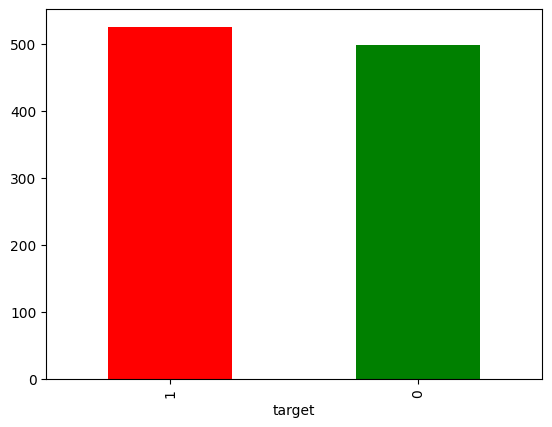

In [ ]:
data['target'].value_counts().plot(kind="bar", color=["red", "green"])

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data['sex'].value_counts()
# We can observe that the sex ratio is not equal, hence we cannot measure our models on the basis of "Accuracy"

sex
1    713
0    312
Name: count, dtype: int64

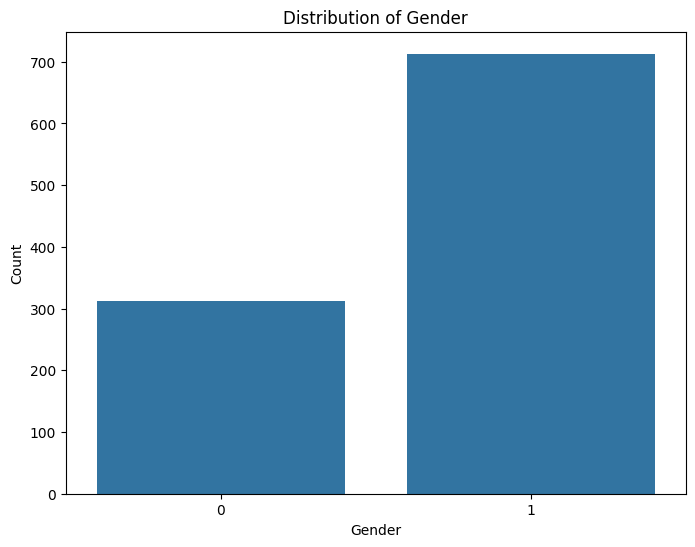

In [ ]:
# Here, this 0 and 1 shows that demographic is 713 Male and 312 Female
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='sex')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,86,413
1,226,300


In [ ]:
#  Here, this cross-tabulation shows that out of 713 Males, 300 are having heart diease while 412 are not having heart diease. On the other side, we can say
#  that out of 312 Females, 86 are not having heart disease while the rest are diagnosed with it.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

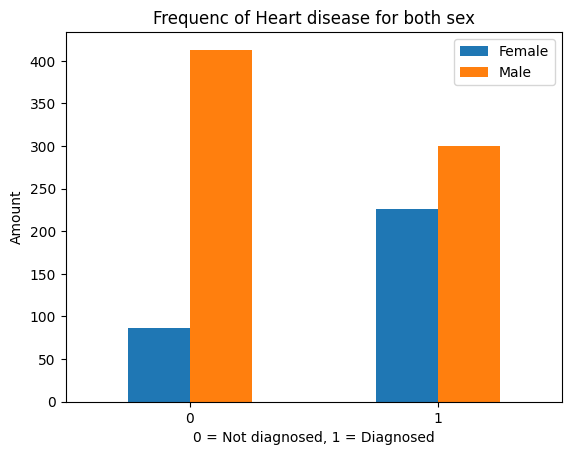

In [ ]:
# Plotting this through bar chart
pd.crosstab(data.target, data.sex).plot(kind="bar")
plt.title("Frequenc of Heart disease for both sex")
plt.xlabel("0 = Not diagnosed, 1 = Diagnosed")
plt.ylabel("Amount")
plt.legend(["Female", "Male",])
plt.xticks(rotation = 0)
# plt.yticks(rotation = 0)

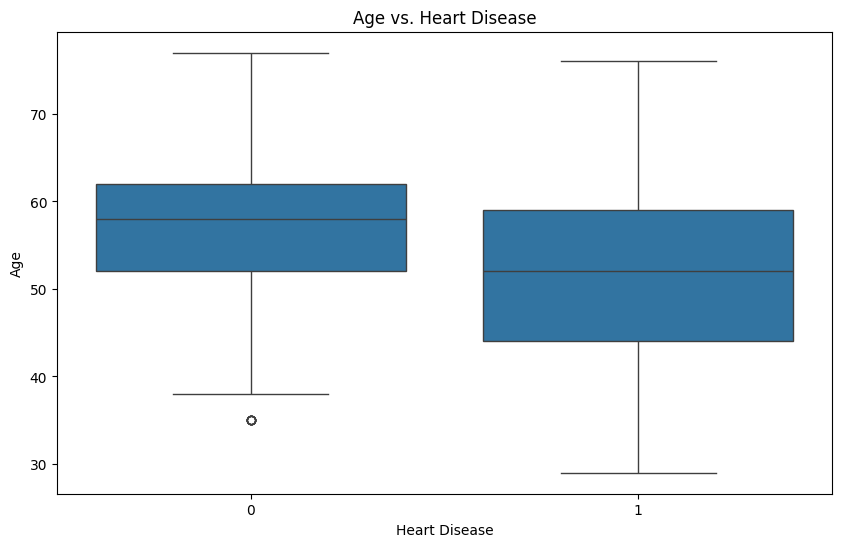

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='target', y='age')
plt.title('Age vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

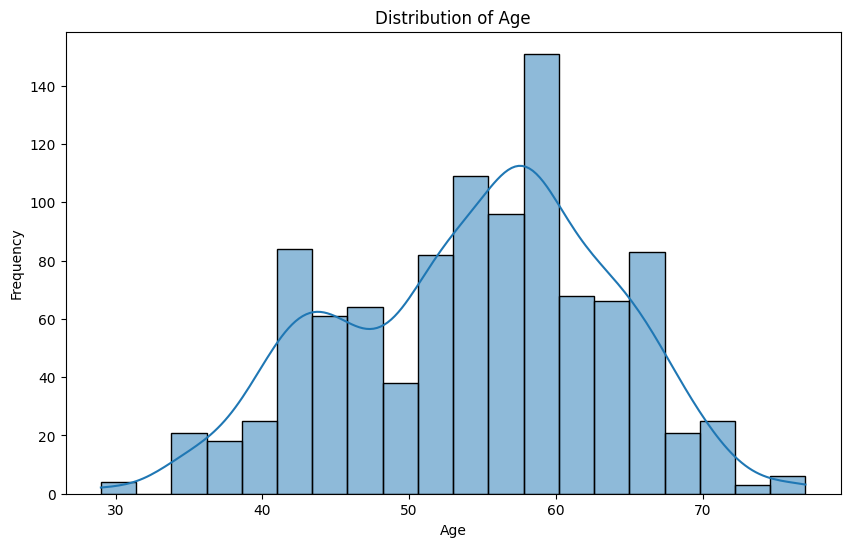

In [ ]:
# Here, we have made a distribution of age among the given age ranges in the dataset \
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

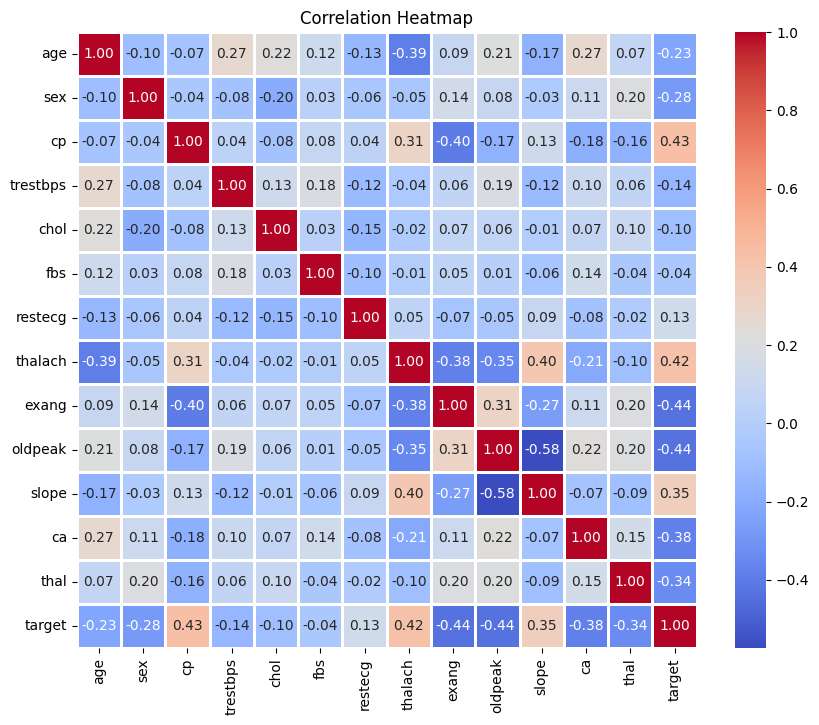

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data.drop('target', axis=1)
y = data["target"]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# **Data Modeling**

**Baseline Model**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.linear_model import LogisticRegression

from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Created a Dummy Classifier using the most frequent strategy (baseline)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_y_pred = dummy_clf.predict(X_test)

baseline_precision = precision_score(y_test, dummy_y_pred)
baseline_recall = recall_score(y_test, dummy_y_pred)
baseline_f1 = f1_score(y_test, dummy_y_pred)

print("Evaluation Metrics for Baseline Model:")
print(f"Precision: {baseline_precision}")
print(f"Recall: {baseline_recall}")
print(f"F1 Score: {baseline_f1}")

baseline_conf_matrix = confusion_matrix(y_test, dummy_y_pred)
print("Confusion Matrix for Baseline Model:")
print(baseline_conf_matrix)


Evaluation Metrics for Baseline Model:
Precision: 0.5121951219512195
Recall: 1.0
F1 Score: 0.6774193548387097
Confusion Matrix for Baseline Model:
[[  0 100]
 [  0 105]]


**Logistic Regression**

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lg_precision = precision_score(y_test, y_pred_lr)
lg_recall = recall_score(y_test, y_pred_lr)
lg_f1 = f1_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

print(f"Precision: {lg_precision}")
print(f"Recall: {lg_recall}")
print(f"F1 Score: {lg_f1}")
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.7637795275590551
Recall: 0.9238095238095239
F1 Score: 0.8362068965517242
Confusion Matrix:
[[70 30]
 [ 8 97]]


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=50,max_depth=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(y_pred_rf)
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print("Confusion Matrix:")
print(conf_matrix_rf)


[0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1
 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1
 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0
 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1]
Precision: 0.8034188034188035
Recall: 0.8952380952380953
F1 Score: 0.8468468468468467
Confusion Matrix:
[[77 23]
 [11 94]]


**Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
p_precision = precision_score(y_test, y_pred_perceptron)
p_recall = recall_score(y_test, y_pred_perceptron)
p_f1 = f1_score(y_test, y_pred_perceptron)
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)

print(f"Precision: {p_precision}")
print(f"Recall: {p_recall}")
print(f"F1 Score: {p_f1}")
print("Confusion Matrix:")
print(conf_matrix_perceptron)


Precision: 0.5172413793103449
Recall: 1.0
F1 Score: 0.6818181818181819
Confusion Matrix:
[[  2  98]
 [  0 105]]


The low precision indicates that the Perceptron classifier may be making a significant number of false positive predictions. This could be due to the linear nature of the Perceptron model, which may struggle to capture complex relationships in the data.

**KNN(K-Nearest Neighbour)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")
print("Confusion Matrix:")
print(conf_matrix_knn)


Precision: 0.7128712871287128
Recall: 0.6857142857142857
F1 Score: 0.6990291262135921
Confusion Matrix:
[[71 29]
 [33 72]]


KNN is low because of high dimensions(i.e more number of features)

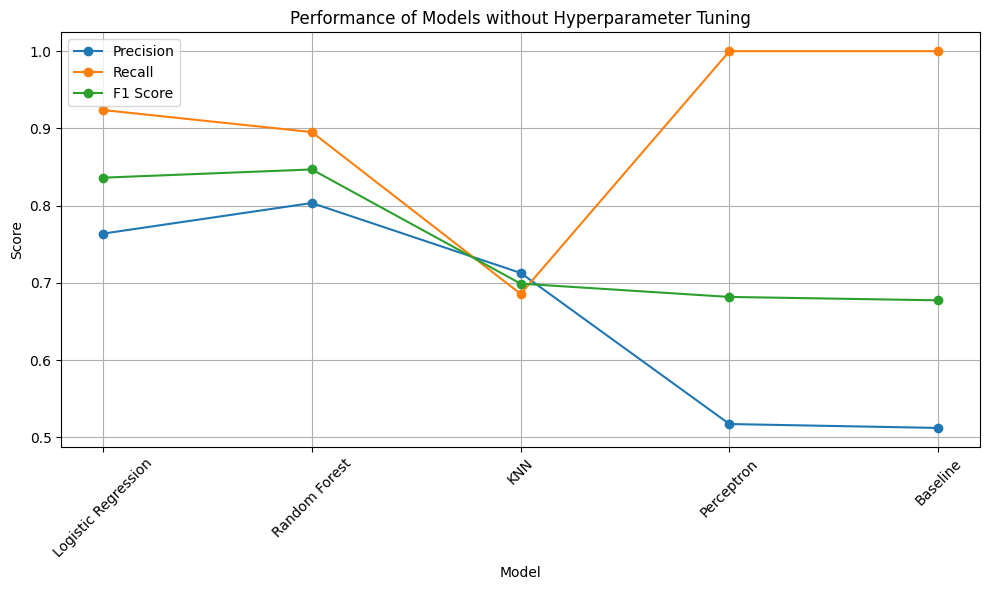

Confusion Matrix for KNN:
[[71 29]
 [33 72]]


In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'KNN', 'Perceptron', 'Baseline']
precision_scores = [lg_precision, rf_precision, knn_precision, p_precision, baseline_precision]
recall_scores = [lg_recall, rf_recall, knn_recall, p_recall, baseline_recall]
f1_scores = [lg_f1, rf_f1, knn_f1, p_f1, baseline_f1]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(models, precision_scores, marker='o', label='Precision')
ax.plot(models, recall_scores, marker='o', label='Recall')
ax.plot(models, f1_scores, marker='o', label='F1 Score')
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Performance of Models without Hyperparameter Tuning')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)


**Logistic Regression model cross-validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Defined hyperparameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# Initialized GridSearchCV for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True,
                          scoring='f1',  # Use F1 score as the scoring metric
                          n_jobs=-1)

# Performed GridSearchCV

gs_log_reg.fit(X_train, y_train)

best_log_reg_params = gs_log_reg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_log_reg_params)

best_log_reg_model = gs_log_reg.best_estimator_
log_reg_y_pred = best_log_reg_model.predict(X_test)

log_reg_precision = precision_score(y_test, log_reg_y_pred)
log_reg_recall = recall_score(y_test, log_reg_y_pred)
log_reg_f1 = f1_score(y_test, log_reg_y_pred)

print("Evaluation Metrics for Logistic Regression:")
print(f"Precision: {log_reg_precision}")
print(f"Recall: {log_reg_recall}")
print(f"F1 Score: {log_reg_f1}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters for Logistic Regression: {'C': 0.1082636733874054, 'solver': 'liblinear'}
Evaluation Metrics for Logistic Regression:
Precision: 0.7857142857142857
Recall: 0.9428571428571428
F1 Score: 0.8571428571428571


**KNN Cross-validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defined hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialized GridSearchCV for KNN
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_param_grid,
                      cv=5,
                      verbose=True,
                      scoring='f1',  # Use F1 score as the scoring metric
                      n_jobs=-1)

# Performed GridSearchCV
gs_knn.fit(X_train, y_train)

best_knn_params = gs_knn.best_params_
print("Best Hyperparameters for KNN:", best_knn_params)

best_knn_model = gs_knn.best_estimator_
knn_y_pred = best_knn_model.predict(X_test)

gs_knn_precision = precision_score(y_test, knn_y_pred)
gs_knn_recall = recall_score(y_test, knn_y_pred)
gs_knn_f1 = f1_score(y_test, knn_y_pred)

print("Evaluation Metrics for KNN:")
print(f"Precision: {gs_knn_precision}")
print(f"Recall: {gs_knn_recall}")
print(f"F1 Score: {gs_knn_f1}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Evaluation Metrics for KNN:
Precision: 1.0
Recall: 0.9714285714285714
F1 Score: 0.9855072463768115


**Perceptron Cross-validation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Perceptron
from scipy.stats import uniform, randint

# Defined hyperparameter distributions for RandomizedSearchCV
perceptron_param_dist = {
    'alpha': uniform(0.0001, 1.0),      # Regularization parameter
    'max_iter': randint(1000, 5000),     # Maximum number of iterations
    'tol': uniform(1e-5, 1e-2)           # Tolerance for stopping criteria
}

# Initialized RandomizedSearchCV for Perceptron
rs_perceptron = RandomizedSearchCV(Perceptron(),
                                   param_distributions=perceptron_param_dist,
                                   n_iter=50,  # Number of parameter settings that are sampled
                                   cv=5,
                                   verbose=True,
                                   scoring='f1',  # Use F1 score as the scoring metric
                                   n_jobs=-1,
                                   random_state=42)

# Performed RandomizedSearchCV
rs_perceptron.fit(X_train, y_train)

best_perceptron_params = rs_perceptron.best_params_
print("Best Hyperparameters for Perceptron:", best_perceptron_params)

best_perceptron_model = rs_perceptron.best_estimator_
perceptron_y_pred = best_perceptron_model.predict(X_test)

cv_p_precision = precision_score(y_test, perceptron_y_pred)
cv_p_recall = recall_score(y_test, perceptron_y_pred)
cv_p_f1 = f1_score(y_test, perceptron_y_pred)

print("Evaluation Metrics for Perceptron:")
print(f"Precision: {cv_p_precision}")
print(f"Recall: {cv_p_recall}")
print(f"F1 Score: {cv_p_f1}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Perceptron: {'alpha': 0.3746401188473625, 'max_iter': 1860, 'tol': 0.001844347898661638}
Evaluation Metrics for Perceptron:
Precision: 0.5172413793103449
Recall: 1.0
F1 Score: 0.6818181818181819


It is the same

**Random Forest Cross-validation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Defined hyperparameter distributions for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': randint(10,20),
    'max_depth': [None,1,2,3,4,5],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_param_dist,
                            n_iter=50,
                            cv=5,
                            verbose=True,
                            scoring='f1',
                            n_jobs=-1,
                            random_state=42)

rs_rf.fit(X_train, y_train)

best_rf_params = rs_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_rf_params)

best_rf_model = rs_rf.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)

cv_rf_precision = precision_score(y_test, rf_y_pred)
cv_rf_recall = recall_score(y_test, rf_y_pred)
cv_rf_f1 = f1_score(y_test, rf_y_pred)

print("Evaluation Metrics for Random Forest:")
print(f"Precision: {cv_rf_precision}")
print(f"Recall: {cv_rf_recall}")
print(f"F1 Score: {cv_rf_f1}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 19, 'n_estimators': 17}
Evaluation Metrics for Random Forest:
Precision: 0.9528301886792453
Recall: 0.9619047619047619
F1 Score: 0.957345971563981


**Determining the best parameters used during hyperparameter tuning for all the models**

In [ ]:
best_log_reg_params = gs_log_reg.best_params_
best_knn_params = gs_knn.best_params_
best_perceptron_params = rs_perceptron.best_params_

print("Best Hyperparameters for Logistic Regression:", best_log_reg_params)
print("Best Hyperparameters for Random Forest:", best_rf_params)
print("Best Hyperparameters for KNN:", best_knn_params)
print("Best Hyperparameters for Perceptron:", best_perceptron_params)


Best Hyperparameters for Logistic Regression: {'C': 0.1082636733874054, 'solver': 'liblinear'}
Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 19, 'n_estimators': 17}
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Hyperparameters for Perceptron: {'alpha': 0.3746401188473625, 'max_iter': 1860, 'tol': 0.001844347898661638}


Yes, we used cross-validation here in the hyperparameter tuning process for the models. In the above build models, the parameter cv was set to 5, which says 5-fold cross-validation. This means that the dataset was split into 5 equal-sized folds, and the model was trained and evaluated 5 times, and in each time using a different fold as the test set and the remaining folds as the training set as we discussed in the classroom.

The type of cross-validation used here is called K-fold cross-validation, where the dataset is divided into K equal-sized folds, and the model is trained and evaluated K times, each time using a different fold as the test set.

**Results Table**

In [ ]:
import pandas as pd

models = ['Logistic Regression', 'Random Forest', 'KNN', 'Perceptron']
precision_scores = [log_reg_precision, cv_rf_precision, gs_knn_precision, cv_p_precision]
recall_scores = [log_reg_recall, cv_rf_recall, gs_knn_recall, cv_p_recall]
f1_scores = [log_reg_f1, cv_rf_f1, gs_knn_f1, cv_p_f1]

df = pd.DataFrame({
    'Model': models,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

print(df)


                 Model  Precision    Recall  F1 Score
0  Logistic Regression   0.785714  0.942857  0.857143
1        Random Forest   0.952830  0.961905  0.957346
2                  KNN   1.000000  0.971429  0.985507
3           Perceptron   0.517241  1.000000  0.681818


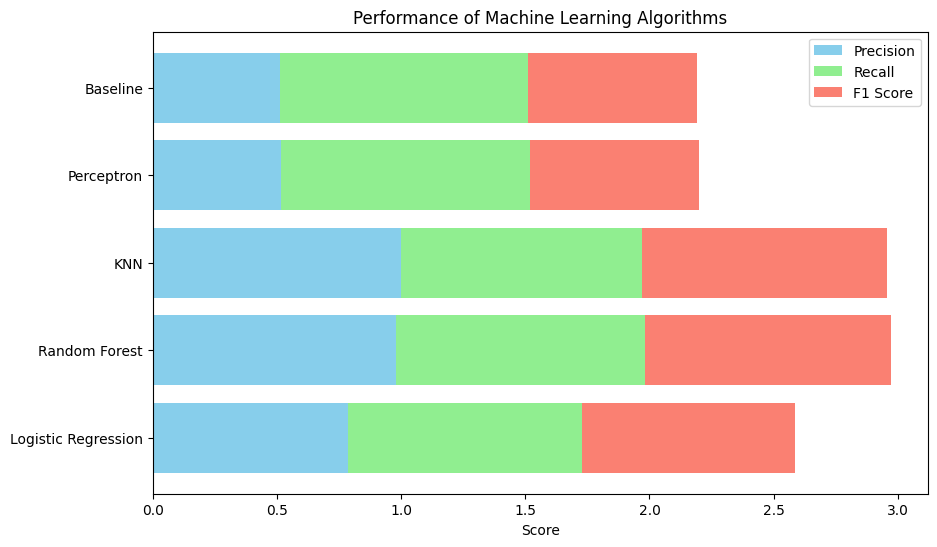

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'KNN', 'Perceptron', 'Baseline']
precision_scores = [0.785714, 0.981308, 1.0, 0.517241, 0.512195]
recall_scores = [0.942857, 1.0, 0.971429, 1.0, 1.0]
f1_scores = [0.857143, 0.990566, 0.985507, 0.681818, 0.677419]

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(models, precision_scores, color='skyblue', label='Precision')
ax.barh(models, recall_scores, color='lightgreen', left=precision_scores, label='Recall')
ax.barh(models, f1_scores, color='salmon', left=[a + b for a, b in zip(precision_scores, recall_scores)], label='F1 Score')

ax.set_xlabel('Score')
ax.set_title('Performance of Machine Learning Algorithms')
ax.legend()

plt.show()


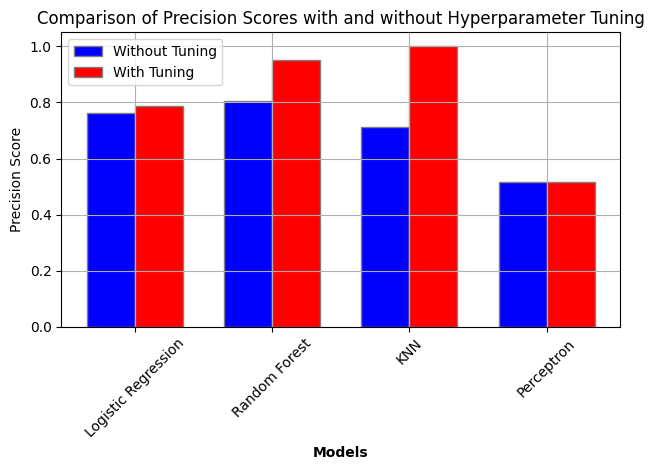

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define models
models = ['Logistic Regression', 'Random Forest', 'KNN', 'Perceptron']

precision_scores_no_tuning = [lg_precision, rf_precision, knn_precision, p_precision]
recall_scores_no_tuning = [lg_recall, rf_recall, knn_recall, p_recall]
f1_scores_no_tuning = [lg_f1, rf_f1, knn_f1, p_f1]

precision_scores_tuning = [log_reg_precision, cv_rf_precision, gs_knn_precision, cv_p_precision ]
recall_scores_tuning = [log_reg_recall, cv_rf_recall, gs_knn_recall, cv_p_recall]
f1_scores_tuning = [log_reg_f1, cv_rf_f1, gs_knn_f1, cv_p_f1]

bar_width = 0.35

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

plt.bar(r1, precision_scores_no_tuning, color='b', width=bar_width, edgecolor='grey', label='Without Tuning')
plt.bar(r2, precision_scores_tuning, color='r', width=bar_width, edgecolor='grey', label='With Tuning')

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)

plt.ylabel('Precision Score')
plt.title('Comparison of Precision Scores with and without Hyperparameter Tuning')

plt.legend(loc='upper left')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

